In [12]:
import pandas as pd 
import scipy.stats as stats
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
# fetch from local path otherwise fetch from the remote path (if remote kernel is being used)
try: 
    sys.path.append('../../../scripts')
    import database
    import utils
except:
    try:
        sys.path.append('./scripts')
        import database
        import utils
    except:
        raise RuntimeError('Failed to import from both local and remote paths. Program terminated.')

# First Hypothesis
In the following notebook it will be analyzed the following hypothesis:
 - **Does the length of the tweets, have an impact on the positivity or negativity of the review?**

In [3]:
db, mongo = database.setup_database()

In [4]:
tweets = pd.DataFrame(list(db.tweets.find()))
tweets.head(10)

,_id,target,text
0,6623a0c4d8a4ade911185691,1,thank twitter add sunisa got meet hin show dc ...
1,6623a0c4d8a4ade911185692,1,ad tweeti new iphon
2,6623a0c4d8a4ade911185693,1,agre
3,6623a0c4d8a4ade911185694,1,your welcom glad enjoy
4,6623a0c4d8a4ade911185695,1,hahaha omg wer laughin hook cuz da rolllryt sh...
5,6623a0c4d8a4ade911185696,1,practic linesmannerismsvoic upcom featur shoot...
6,6623a0c4d8a4ade911185697,1,today two month anniversari love sooooooo much...
7,6623a0c4d8a4ade911185698,1,upload pictur friendster
8,6623a0c4d8a4ade911185699,1,apart sore tryout
9,6623a0c4d8a4ade91118569a,1,bonjour spacecowboyi wish either work kid go w...


### Metrics (length)
For performing this analysis, we obtain the length of each tweet and  include it as an additional column in the dataframe.

In [5]:
tweets['length'] = tweets['text'].apply(len)

In [6]:
tweets.describe()

,target,length
count,100745.000000,100745.000000
mean,0.498466,39.396675
std,0.500000,22.087176
min,0.000000,1.000000
25%,0.000000,21.000000
50%,0.000000,36.000000
75%,1.000000,55.000000
max,1.000000,132.000000


# Correlation Test
We are using Spearman's correlation coefficient test to find out whether we have positive correlation or negative correlation with the length of the tweet. Furthermore, we are also inspecting the value of p to assess the significance of the length feature.

In [7]:
# Piersen correlation
spearman_r_stat, p_value = spearman_r_stat, p_value = stats.spearmanr(tweets['target'], tweets['length'])

# Interpretation of the Resuts
Since the value of the coefficient is close to zero it means that it has a very weak correlation. Although, the value of p is statistically significant since it is less that 0.05.

In [14]:
print(f'Spearman correlation coefficient: {spearman_r_stat:.4f} p-value: {p_value}')

if p_value < 0.05:
    print('The correlation is significant hence reject the null hypothesis')
else:
    print('Do not reject the null hypothesis')

Spearman correlation coefficient: -0.0359 p-value: 4.3539266335030966e-30
The correlation is significant hence reject the null hypothesis


# Effect Size
To invalidate the significance fallacy, we used Cohen's d test to see the effect size for the two groups.

In [9]:
group1 = tweets[tweets['target'] == 0]['length']
group2 = tweets[tweets['target'] == 1]['length']
cohen_d = utils.cohen_d(group1, group2)
print(f'Cohen\'s d: {cohen_d:.4f}') 

Cohen's d: 0.0720


# Interpretation of Cohen's d:
 - Cohen's d values around 0.2 are considered small effect sizes.
 - Values around 0.5 represent medium effect sizes.
 - Values of 0.8 or higher indicate large effect sizes.

The effect size obtained is close to zero, which suggests extremely small effect size. Therefore, there is very little difference between the means of the two groups relative to the variablity within the groups. We can infer that the difference is likely not practically significant, although it is statistically significant due to large sample size.

In [10]:
mongo.close()

## Visualization of the Tweet Length Distribution by sentiment

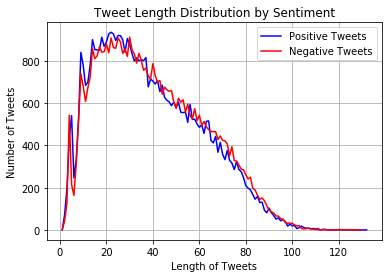

In [13]:
# Separate positive and negative tweets
positive_tweets = tweets[tweets['target'] == 1]
negative_tweets = tweets[tweets['target'] == 0]

# Group positive and negative tweets by their length and count the occurrences
positive_tweet_length_counts = positive_tweets.groupby('length').size()
negative_tweet_length_counts = negative_tweets.groupby('length').size()

plt.plot(positive_tweet_length_counts.index, positive_tweet_length_counts.values, color='blue', label='Positive Tweets')
plt.plot(negative_tweet_length_counts.index, negative_tweet_length_counts.values, color='red', label='Negative Tweets')
plt.xlabel('Length of Tweets')
plt.ylabel('Number of Tweets')
plt.title('Tweet Length Distribution by Sentiment')
plt.legend()
plt.grid(True)
plt.show()

In the above graph, we can see that the two lines for the different sentiment are almost identical. Hence, we can conclude that there might be not be a signifant influence of the tweets' length on the sentiment.